In [6]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import yaml

In [24]:
def graph_model(out, p):
    Sh, Eh, Iha, Ihs, Rh, Sv, Ev, Iv = out
    fig = plt.figure(facecolor='w', figsize=[2*6.4, 2*4.8])
    ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    #ax.plot(t, Sh, 'b', alpha=0.5, lw=2, label='Susceptible Humans')
    #ax.plot(t, Iha+Ihs, 'r', alpha=0.5, lw=2, label='Infected Humans')
    ax.plot(t, Iv, 'k', alpha=0.5, lw=2, label='Infected Vectors')
    #ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Cases')
    #ax.set_xlim(0,500)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    plt.title("Dengue Incidence")
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()
    
def model_dengue(y, t, p):

    Sh, Eh, Iha, Ihs, Rh, Sv, Ev, Iv = y
    N_h = sum([Sh, Eh, Iha, Ihs, Rh])
    N_v = sum([Sv, Ev, Iv])
    
    # TODO add functional form of b_h, b_v
    
    lambda_h = p['b_h'] * p['beta_h'] * Iv / N_v
    lambda_v = p['b_v'] * p['beta_v'] * (Iha + Ihs) / N_h
    
    dSh = -lambda_h * Sh
    dEh = lambda_h * Sh - p['nu_h'] * Eh
    dIha = p['psi'] * p['nu_h'] * Eh - p['gamma_h'] * Iha
    dIhs = (1 - p['psi']) * p['nu_h'] * Eh - p['gamma_h'] * Ihs
    dRh = p['gamma_h'] * (Iha + Ihs)
    dSv = -lambda_v * Sh
    dEv = lambda_v * Sh - p['nu_v'] * Ev
    dIv = p['nu_v'] * Ev - p['mu_v'] * Iv

    return dSh, dEh, dIha, dIhs, dRh, dSv, dEv, dIv

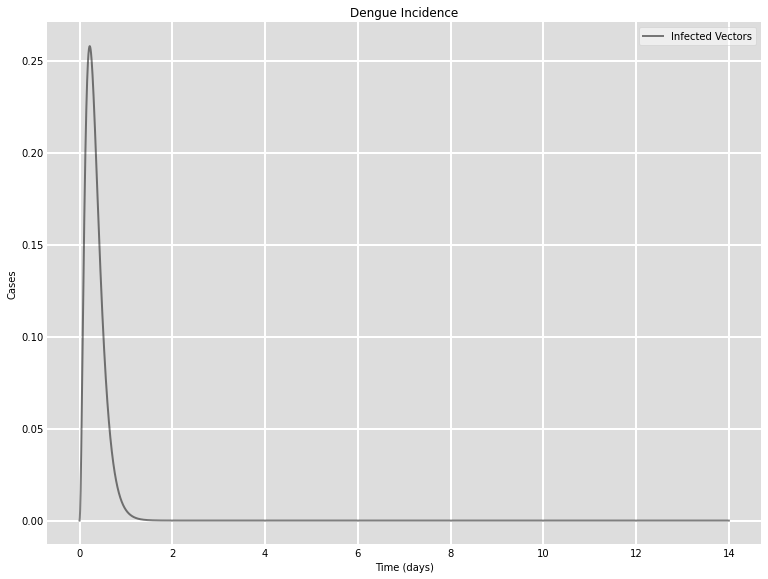

In [25]:
with open('config.yaml', 'r') as in_file:
    params = yaml.load(in_file, Loader=yaml.FullLoader)['DENGUE']
p = params['PARAMETERS']
s_init = params["INITIAL_STATES"]

days = 14
t = np.linspace(0, days, days*500)

y0 = s_init['Sh'], s_init['Eh'], s_init['Iha'], s_init['Ihs'],\
    s_init['Rh'], s_init['Sv'], s_init['Ev'], s_init['Iv']
output = odeint(model_dengue, y0, t, args = (p,))
Sh, Eh, Iha, Ihs, Rh, Sv, Ev, Iv = output.T
graph_model(output.T, p)